In [1]:
from src import precompOnTraj
from src import plotTraj

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelmin
import pandas as pd

In [3]:
json_file = "GrabbingPrimitives/recordings/rec_1/processedAABBs.json"


In [4]:
trj1_path = "GrabbingPrimitives/recordings/rec_1/extracted/trj_1_hand.csv"
trj = np.loadtxt(trj1_path, delimiter=",")

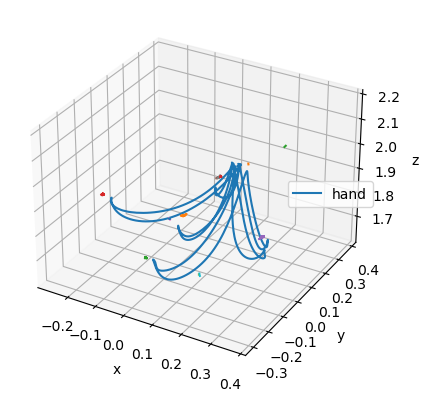

In [5]:
plotTraj.plot_from_raw(json_file)

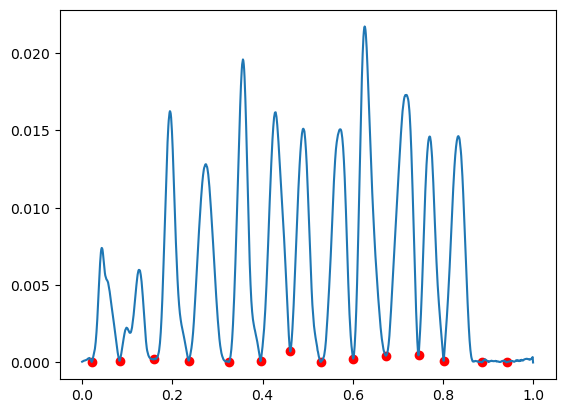

In [6]:
v = precompOnTraj.get_velocity(trj)
v_abs = np.linalg.norm(v, axis=1)
    
t = np.linspace(0,1, len(v_abs))
    
signal_lows_at_t = argrelmin(v_abs, order=50)
# fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
    
plt.plot(t, v_abs)
plt.scatter(t[signal_lows_at_t], v_abs[signal_lows_at_t], color="red")
    
plt.show()

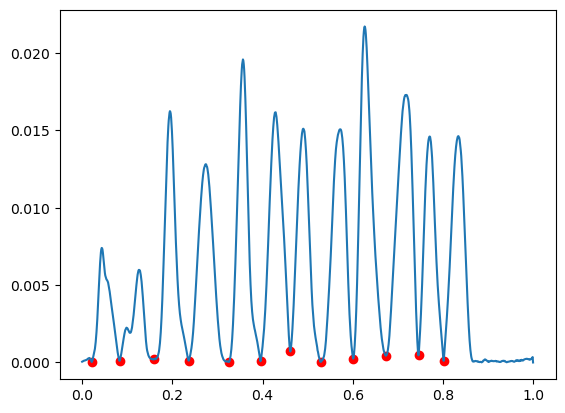

In [7]:
devider_idxs = signal_lows_at_t[0][:-2]
plt.plot(t, v_abs)

plt.scatter(t[devider_idxs], v_abs[devider_idxs], color="red")
    
plt.show()

In [8]:
xs = trj[:,0]
ys = trj[:,1]
zs = trj[:,2]

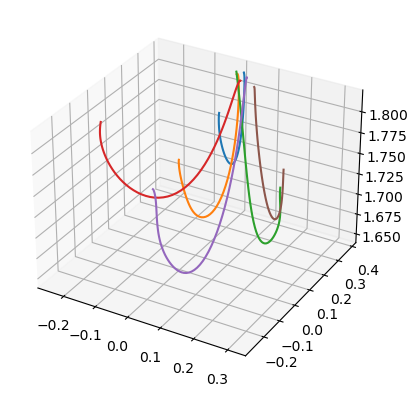

In [11]:
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

for startidx, endidx in zip(devider_idxs[:-1:2], devider_idxs[1::2]):
    
    ax.plot(xs[startidx:endidx], ys[startidx:endidx], zs[startidx:endidx])

    savedata = np.hstack((trj[startidx:endidx, :], v[startidx:endidx, :]))
    
    startpoint = trj[startidx]
    endpoint = trj[endidx]
    
    savename = f"GrabbingPrimitives/trajectories/from_{startpoint}_to_{endpoint}.csv"
    np.savetxt(savename, savedata, delimiter=",", header="x, y, z, vx, vy, vz")

plt.show()

